DES Lab
---

In [59]:
using Plots, IJulia, Images, FileIO

Part 1: Encrypt and Decrypt an Image with OpenSSL
---

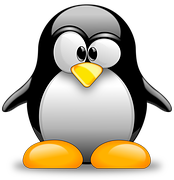

In [60]:
original_img_path = "tux.png"
original_img = load(original_img_path)

### Encrypt the image with OpenSSL

- Key: 4200000000000000
- Init. Vector: 4300000000000000


```bash
openssl enc -des -in tux.png -out tux_enc.out -v -p -K 42 -iv 43 -e
```


### Decrypt the image with the key

```bash
openssl enc -des -in tux_enc.out -out tux_dec.png -v -p -K 42 -iv 43 -d
```

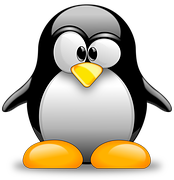

In [61]:
decrypted_img_path = "tux_dec.png"
decrypted_img = load(decrypted_img_path)

Part 2: Avalanche Effect
---

- Change one bit in the key at a time
- Compare the bit difference to the original encrypted image

```bash
openssl enc -des -in tux.png -out F0 -v -p -K 0 -iv 0 -e
openssl enc -des -in tux.png -out F1 -v -p -K 1 -iv 0 -e
openssl enc -des -in tux.png -out F2 -v -p -K 3 -iv 0 -e
openssl enc -des -in tux.png -out F3 -v -p -K 7 -iv 0 -e
openssl enc -des -in tux.png -out F4 -v -p -K F -iv 0 -e
.
.
.
```
Etc.

### Procedure
- Read images F0, Fn as bytes
- Broadcast XOR over each UInt8 array
- Convert each byte to a bitstring and join
- Count the number of 1s
- Divide by the number of bits for the ratio of changed bits

In [62]:
bitlength(f) = length(read(open(f))) * 8
bitdiff(f1, f2) = count('1', join(bitstring(b) for b in read(open(f1)) .⊻ read(open(f2))))

bitdiff (generic function with 1 method)

In [63]:
F0 = "F0"
F0_len = bitlength(F0)

179904

In [64]:
nfiles = 11
files = ["F$(n)" for n in 1:nfiles]

11-element Vector{String}:
 "F1"
 "F2"
 "F3"
 "F4"
 "F5"
 "F6"
 "F7"
 "F8"
 "F9"
 "F10"
 "F11"

In [65]:
bit_differences = [bitdiff(F0, Fn) for Fn in files]

11-element Vector{Int64}:
 89842
 90040
 89804
 89915
 89727
 90082
 89839
 90194
 90047
 90040
 89619

In [66]:
diff_ratios = [Fn_diff / F0_len for Fn_diff in bit_differences]

11-element Vector{Float64}:
 0.49938856278904303
 0.5004891497687656
 0.4991773390252579
 0.49979433475631446
 0.49874933297758806
 0.5007226076129492
 0.4993718872287442
 0.5013451618641053
 0.5005280594094629
 0.5004891497687656
 0.4981490128068303

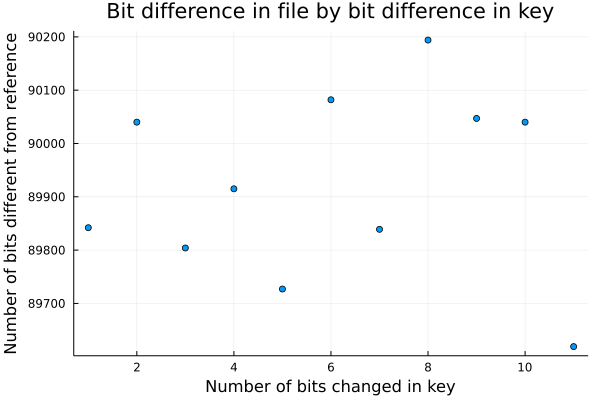

In [67]:
p1 = scatter(1:11, bit_differences, 
    title="Bit difference in file by bit difference in key",
    xlabel="Number of bits changed in key",
    ylabel="Number of bits different from reference",
    legend=false)

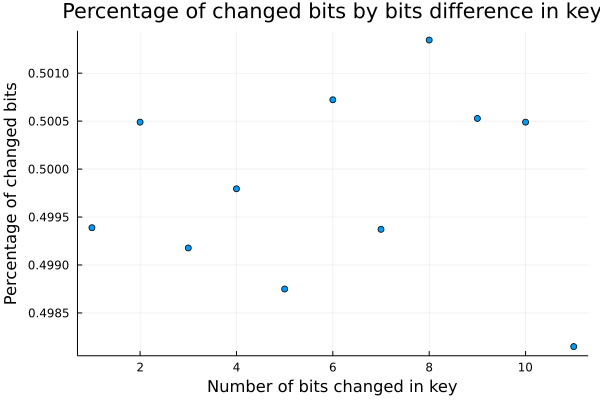

In [68]:
p2 = scatter(1:11, diff_ratios,
    title="Percentage of changed bits by bits difference in key",
    xlabel="Number of bits changed in key",
    ylabel="Percentage of changed bits",
    legend=false)

In [69]:
println("Average number of changed bits: $(mean(bit_differences))")
println("Average percentage of changed bits: $(mean(diff_ratios))")

Average number of changed bits: 89922.63636363637
Average percentage of changed bits: 0.4998367816370752
